In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sys
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

sys.path.append('../')

In [5]:
from src.models import TabularTransformer

In [6]:
# https://epistasislab.github.io/
from pmlb import fetch_data

data = fetch_data('adult')
target_column = ['target']
categorical_features = data.drop(columns=target_column).select_dtypes(include=np.int64).columns.to_list()
numeric_features = data.select_dtypes(include=np.float64).columns.to_list()

features = data[numeric_features+categorical_features].copy()
target = data[target_column].copy()

categorical_features
for feat in categorical_features:
    if features[feat].nunique()>10:
        features.loc[:,feat] = features.loc[:,feat].apply(lambda x: f"{feat}_{x}")



In [7]:
tt = TabularTransformer(
    emb_dim=32, 
    tr_depth=6, 
    tr_heads=8, 
    tr_ff_dim=16, 
    tr_attn_dropout=0.1, 
    tr_ff_dropout=0.1,
    mlp_hidden_mults=[4,2],
    mlp_activation='relu'
)

In [8]:
tt.fit(features, target, batch_size=128, epochs=10, eval_size=0.1, learning_rate=1e-4)

Epoch 1/10
344/344 [==============================] - 127s 322ms/step - loss: 0.3558 - accuracy: 0.8330 - mean_recall: 0.7331 - mean_precision: 0.7805 - multi_class_confusion_matrix: 10989.2500 - val_loss: 0.2975 - val_accuracy: 0.8618 - val_mean_recall: 0.7711 - val_mean_precision: 0.8169 - val_multi_class_confusion_matrix: 1221.2500
Epoch 2/10
344/344 [==============================] - 108s 314ms/step - loss: 0.3226 - accuracy: 0.8500 - mean_recall: 0.7649 - mean_precision: 0.8041 - multi_class_confusion_matrix: 10989.2500 - val_loss: 0.2911 - val_accuracy: 0.8633 - val_mean_recall: 0.7858 - val_mean_precision: 0.8131 - val_multi_class_confusion_matrix: 1221.2500
Epoch 3/10
344/344 [==============================] - 88s 256ms/step - loss: 0.3150 - accuracy: 0.8521 - mean_recall: 0.7676 - mean_precision: 0.8073 - multi_class_confusion_matrix: 10989.2500 - val_loss: 0.2869 - val_accuracy: 0.8663 - val_mean_recall: 0.7891 - val_mean_precision: 0.8183 - val_multi_class_confusion_matrix: 

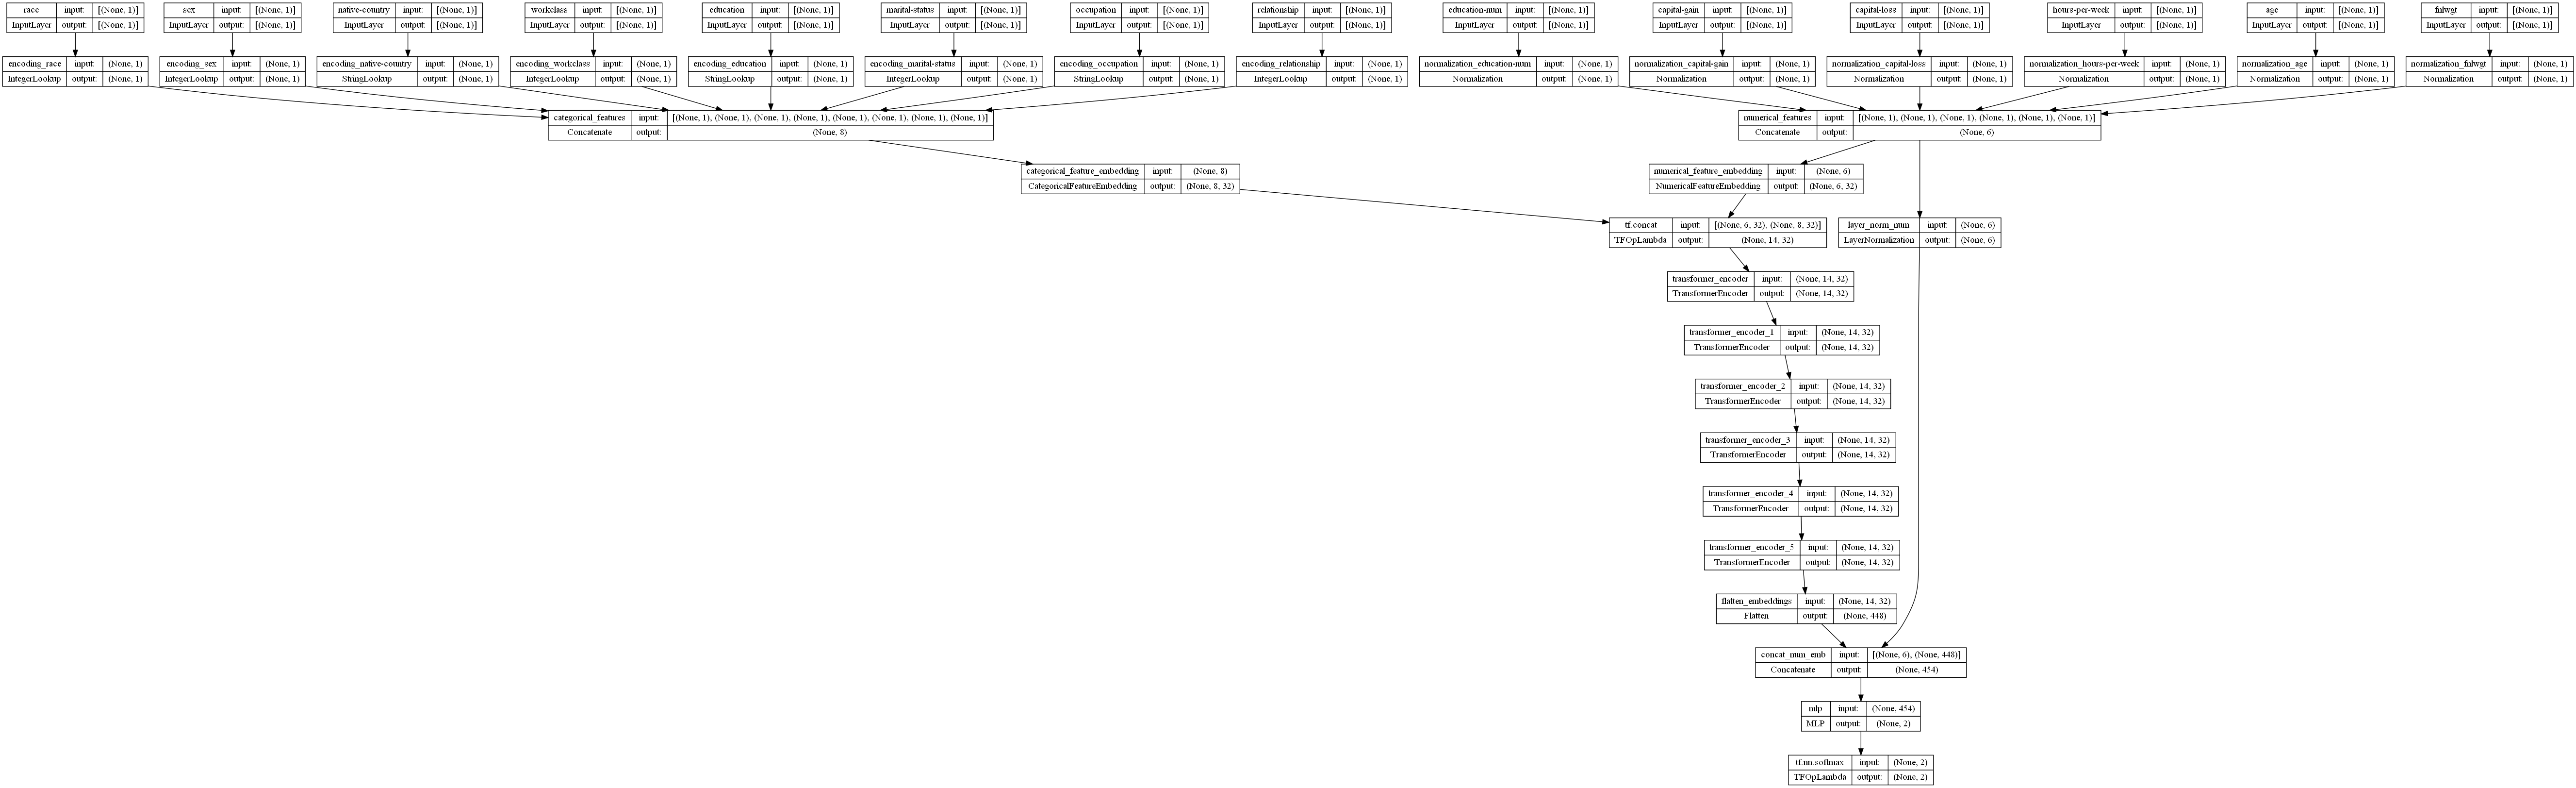

In [10]:
tf.keras.utils.plot_model(tt.model, 
    to_file='../data/model_example.png' ,
    show_shapes=True
)